# Programming Assignment - 9
---
## Name: Patrick McElroy
---

In [108]:
# Import required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler


%matplotlib inline

np.random.seed(100)

## Question 1
---
Set up a linear regression model for the miles per gallon on the data at automobile [UCI](https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/).  Discard the categorical data.

>1. Get feature matrix X, and target variable y.
>1. Split data into training and testing.
>1. Normalize data using MinMaxScaler.
>1. Creat a LinearRegression object for modeling.
>1. Train the model with training data.
>1. Look at R^2 score for the goodness of fit for the train and test data.
>1. Present a graphical comparison of true and observed responses for the test data.

In [109]:
# Your code comes here
#Step 1 Get feature matrix X and target variable y
UCI = pd.read_excel("./MPG_Data.xlsx")

In [110]:
UCI.head(4)

,MPG,Cyl,Dis,Hrspwr,Weight,Accel,Yr,Origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1


In [111]:
UCI1 = np.where(UCI.values == '?')
UCI2 = UCI.replace('?', 0)
uci = UCI2.replace(0, UCI2["Hrspwr"].mean())

In [145]:
mpg_mat = uci.values
mpg_mat.shape

(398, 8)

In [196]:
#Step 2 Split Data into Training and Testing
X = mpg_mat[:,1:]
y = mpg_mat[:,0]
y.shape
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=100)

In [197]:
#Step 3 Normalize Data
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_n = scaler.transform(X_train)
X_test_n = scaler.transform(X_test)

In [198]:
#Step 4 Create linreg model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [199]:
#Step 5 Train the model
lr.fit(X_train_n, y_train)

LinearRegression()

In [200]:
y_pred = lr.predict(X_test_n)
print (np.round(y_pred[1:6],2))
print (y_test[1:6])

[29.7  20.63 22.91 28.98 21.95]
[35. 21. 20. 27. 19.]


In [201]:
#Step 6 Look at R^2 for fit of data
print("R-squared for the training data: ", lr.score(X_train_n, y_train))
print("R-squared for the test data: ", lr.score(X_test_n, y_test))

R-squared for the training data:  0.816053069393984
R-squared for the test data:  0.8320629655747912


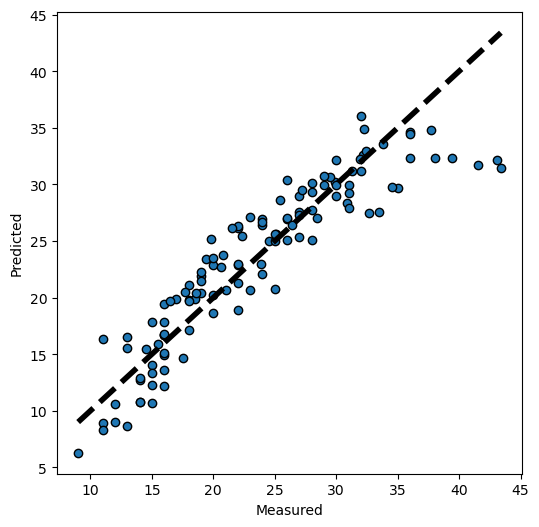

In [202]:
#Step 7 Graphical Representation of True and Observed for Test Data
fig, ax = plt.subplots()
fig.set_size_inches(6,6)
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [203]:
# Improve the Model
# First by preprossing with a polynomial feature class
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

In [204]:
Xp = poly.fit_transform(X)
print (Xp.shape) 

(398, 35)


In [205]:
Xp_train, Xp_test, y_train, y_test  = train_test_split(Xp, y, test_size=0.25, random_state=10)

In [206]:
normalizer = MinMaxScaler()
normalizer.fit(Xp_train)
Xpn_train = normalizer.transform(Xp_train)
Xpn_test = normalizer.transform(Xp_test)

In [207]:
# Create Linear Regression Model
from  sklearn.linear_model import LassoCV
linreg = LassoCV(alphas=[  0.01, 0.05, 1.0, 5, 10, 100], max_iter=10000, tol=0.00001)
linreg.fit(Xpn_train, y_train)

LassoCV(alphas=[0.01, 0.05, 1.0, 5, 10, 100], max_iter=10000, tol=1e-05)

In [208]:
#R-squared for training and test
print("R-squared for the training data: ", linreg.score(Xpn_train, y_train))
print ("R-squared for the test data: ", linreg.score(Xpn_test, y_test))

R-squared for the training data:  0.875731505822402
R-squared for the test data:  0.8509525244230043


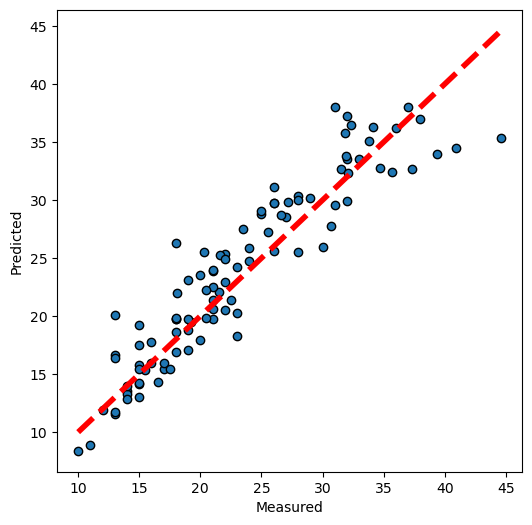

In [209]:
yp_pred = linreg.predict(Xpn_test)
fig, ax = plt.subplots()
fig.set_size_inches(6,6)
ax.scatter(y_test, yp_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Question 2
---
Setup a logistic regression model on the data at [adultUCI](http://archive.ics.uci.edu/ml/datasets/Adult).  Discuss the performance of your model using appropriate statistics. Use dummy variables to handle categorical variables. 

1. Prepare the data. Create dummy variables for categorical variables. [See this](https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example)
2. Get feature matrix X, and target variable y (>50k or <50k)
3. Split data into training and testing
4. Normalize data using MinMaxScaler
5. Creat a LogisticRegression object for modeling
6. Train the model with training data
7. Compare the precision, recall, and F1-score on the train and test data.

In [210]:
# Your code comes here
#Step 1: Prepare and create dummy variables for categorical variables
AD = pd.read_excel("./adult_salary.xlsx")

In [211]:
AD.head(5)

,Age,Work Class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hrs per week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [212]:
AD1 = AD.replace({"Income": {"<=50K":1, ">50K":0}})
ad = pd.get_dummies(AD1, columns = ["Work Class", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"])


In [213]:
ad.shape
ad.head()

,Age,fnlwgt,education-num,capital-gain,capital-loss,hrs per week,Income,Work Class_?,Work Class_Federal-gov,Work Class_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [214]:
#Step 2: Get Feature matrix X and target variable y
np.set_printoptions(precision=2)
X = ad.values
y = ad.Income

In [215]:
#Step 3: Split data into training and testing
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=100)

In [216]:
#Step 4: Normalize Data
scaler =MinMaxScaler()
scaler.fit(X_train)
X_train_n = scaler.transform(X_train)
X_test_n = scaler.transform(X_test)

In [217]:
#Step 5: Create an object for Logistic Regressor
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(C=1000, tol=0.0001, max_iter=200)

In [218]:
#Step 6: Train model with training data
lrc.fit(X_train_n, y_train)

LogisticRegression(C=1000, max_iter=200)

In [219]:
#Step 7: Compare the precision, recall, and F1-score on the train and test data
from sklearn.metrics import confusion_matrix, classification_report

y_pred = lrc.predict(X_test_n)

print ("Confusion Matrix:\n",confusion_matrix(y_test, y_pred ))
print ("\n Classification Report:\n", classification_report(y_test, 
                                                            lrc.predict(X_test_n),
                                                            target_names= ["<=50K", ">50K"], 
                                                            digits=2))

Confusion Matrix:
 [[2341    0]
 [   0 7428]]

 Classification Report:
               precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00      2341
        >50K       1.00      1.00      1.00      7428

    accuracy                           1.00      9769
   macro avg       1.00      1.00      1.00      9769
weighted avg       1.00      1.00      1.00      9769

